In [59]:
## Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.grid_search import GridSearchCV

In [168]:
## Loading the dataset. Used column names given in the description of dataset
df = pd.read_csv('adult.data.txt', skipinitialspace=True, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"], na_values='?')

In [284]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [170]:
## Checking if any column has null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [172]:
df = df.dropna()

In [174]:
## Checking the summary statistics of the dataset
df.describe(include ="all")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162,30162
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504,22654
mean,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN,NaN
std,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176272e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.376285e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
## Checking the data type of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

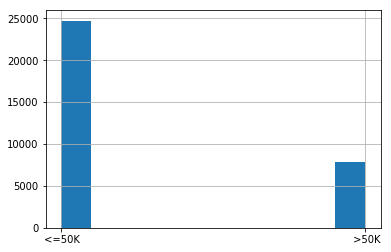

In [13]:
df['income'].hist()

This plot shows that entries with income less than 50K are more than double in volume compared to those where income is more than 50K. In other words, we have an imbalanced dataset. 

The reason for choosing histogram is because income is a categorical variable and the mark(line) and channel(length) of histogram makes it very easy to compare the count (or volume) of these two categories. 

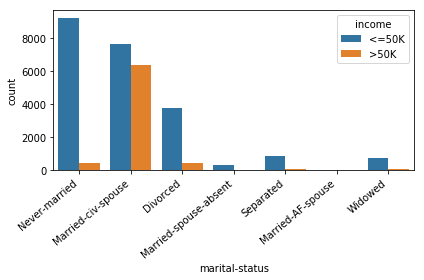

In [176]:
ax = sns.countplot(df['marital-status'], hue=df['income'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

This visualization shows that "married-civ-spouse" has the majority of users with income >50K. People who were never married consist of the majority of people who earn <=50K. 

We've used dodged barplot here where marks are the lines and channels are length and color which makes it easy to compare different categories of marital-status and income side-by-side. 

In [178]:
def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

cols = ["workclass","education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
encoded_df = one_hot(df, cols)

In [179]:
encoded_df = encoded_df.drop(["workclass","education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"], axis=1)

In [180]:
encoded_df.dtypes

age                                           int64
fnlwgt                                        int64
education-num                                 int64
capital-gain                                  int64
capital-loss                                  int64
hours-per-week                                int64
income                                       object
workclass_Federal-gov                         uint8
workclass_Local-gov                           uint8
workclass_Private                             uint8
workclass_Self-emp-inc                        uint8
workclass_Self-emp-not-inc                    uint8
workclass_State-gov                           uint8
workclass_Without-pay                         uint8
education_10th                                uint8
education_11th                                uint8
education_12th                                uint8
education_1st-4th                             uint8
education_5th-6th                             uint8
education_7t

In [182]:
## Encoding income
encoded_df.income = np.where(encoded_df.income == '>50K',1,0)

In [185]:
from sklearn.model_selection import train_test_split

y = encoded_df['income']

encoded_df = encoded_df.drop(['income'], axis=1)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size=0.2)

In [187]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(24129, 104) (24129,)
(6033, 104) (6033,)


In [188]:
scaler = preprocessing.StandardScaler()
X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
X_test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.transform(X_test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [189]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
15837,0.654134,1.448686,-3.178754,-0.148908,-0.220258,-2.413842,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2940,-1.023374,-1.064179,-0.435404,-0.148908,-0.220258,-0.496319,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
25550,0.120381,-0.526959,-0.043497,-0.148908,-0.220258,-0.079466,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
29050,-1.480876,0.967341,-0.043497,-0.148908,-0.220258,-1.330025,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9327,-1.252125,1.702884,0.348411,-0.148908,-0.220258,-0.913172,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


We have performed one hot encoding on categorical variables and standard-scaler on others. We have manually encoded "income" column as well which we later removed from the main dataset and stored in y. Then we performed a 80/20 train/test split on the dataset.

In [190]:
## capturing values of neighbors and p
k_range = list(range(1, 11))
print(k_range)

p_range = list(range(1,3))
print(p_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2]


In [191]:
## Preparing dictionary of parameters for grid search
param_grid = dict(n_neighbors=k_range, p = p_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2]}


In [192]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1', n_jobs=8)

In [193]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [203]:
## Storing the results of grid search in a dataset

results_df = pd.DataFrame(grid.grid_scores_)

In [209]:
results_df

,parameters,mean_validation_score,cv_validation_scores
0,"{'n_neighbors': 1, 'p': 1}",0.592319,"[0.6009852216748769, 0.6031483015741508, 0.591..."
1,"{'n_neighbors': 1, 'p': 2}",0.599567,"[0.599835661462613, 0.600836820083682, 0.60606..."
2,"{'n_neighbors': 2, 'p': 1}",0.526209,"[0.5284210526315789, 0.5370950888192267, 0.526..."
3,"{'n_neighbors': 2, 'p': 2}",0.529892,"[0.5222929936305732, 0.5147679324894515, 0.528..."
4,"{'n_neighbors': 3, 'p': 1}",0.620150,"[0.626736111111111, 0.63249348392702, 0.624040..."
5,"{'n_neighbors': 3, 'p': 2}",0.624649,"[0.629661751951431, 0.6242371403661726, 0.6267..."
6,"{'n_neighbors': 4, 'p': 1}",0.582649,"[0.571715145436309, 0.5790513833992094, 0.5852..."
7,"{'n_neighbors': 4, 'p': 2}",0.587790,"[0.5794205794205795, 0.5736894164193868, 0.594..."
8,"{'n_neighbors': 5, 'p': 1}",0.634920,"[0.6433691756272403, 0.6283185840707965, 0.632..."
9,"{'n_neighbors': 5, 'p': 2}",0.642418,"[0.6406388642413487, 0.631118881118881, 0.6478..."


In [212]:
## Filtering out cases where p = 1 

for j in range(20):
        if j % 2 == 0:
            results_df = results_df.drop([j])

In [213]:
results_df

,parameters,mean_validation_score,cv_validation_scores
1,"{'n_neighbors': 1, 'p': 2}",0.599567,"[0.599835661462613, 0.600836820083682, 0.60606..."
3,"{'n_neighbors': 2, 'p': 2}",0.529892,"[0.5222929936305732, 0.5147679324894515, 0.528..."
5,"{'n_neighbors': 3, 'p': 2}",0.624649,"[0.629661751951431, 0.6242371403661726, 0.6267..."
7,"{'n_neighbors': 4, 'p': 2}",0.587790,"[0.5794205794205795, 0.5736894164193868, 0.594..."
9,"{'n_neighbors': 5, 'p': 2}",0.642418,"[0.6406388642413487, 0.631118881118881, 0.6478..."
11,"{'n_neighbors': 6, 'p': 2}",0.613868,"[0.6201550387596899, 0.5986653956148712, 0.614..."
13,"{'n_neighbors': 7, 'p': 2}",0.650702,"[0.6516245487364621, 0.6353982300884956, 0.654..."
15,"{'n_neighbors': 8, 'p': 2}",0.626128,"[0.6327900287631831, 0.6116322701688555, 0.620..."
17,"{'n_neighbors': 9, 'p': 2}",0.649917,"[0.6588235294117647, 0.6395759717314489, 0.637..."
19,"{'n_neighbors': 10, 'p': 2}",0.630840,"[0.6275992438563327, 0.6261682242990654, 0.622..."


Visualize performance of the algorithm across various values for K (holding p constant at it’s default value of 2 here). Since you’re doing 10-fold cv for each value of K, you actually have 100 values total (10 values for each of the 10 values of K). Please find an appropriate way to encode this data (don’t just make a line chart with the means!)

In [234]:
matrix = results_df.cv_validation_scores.as_matrix()

In [246]:
matrix

array([array([0.59983566, 0.60083682, 0.60606061, 0.59755102, 0.60953921,
       0.60488627, 0.60927152, 0.5914787 , 0.60189166, 0.5743073 ]),
       array([0.52229299, 0.51476793, 0.52868852, 0.53798768, 0.56850716,
       0.54100106, 0.52421053, 0.54736842, 0.51198257, 0.50210084]),
       array([0.62966175, 0.62423714, 0.62679023, 0.62842466, 0.64      ,
       0.65905097, 0.61759729, 0.62283737, 0.60768543, 0.59019264]),
       array([0.57942058, 0.57368942, 0.59464627, 0.58007812, 0.62378168,
       0.60618146, 0.60058309, 0.58858268, 0.57259714, 0.55832502]),
       array([0.64063886, 0.63111888, 0.64781491, 0.64242424, 0.65147679,
       0.66015972, 0.65868263, 0.63414634, 0.64070796, 0.61700263]),
       array([0.62015504, 0.5986654 , 0.61421801, 0.61305582, 0.62792877,
       0.63829787, 0.62921348, 0.61990521, 0.60079051, 0.57643622]),
       array([0.65162455, 0.63539823, 0.65401208, 0.64845815, 0.66894782,
       0.66963491, 0.65924658, 0.64471404, 0.64452424, 0.63045414]),

In [248]:
## Store the validation scores for each split in a dataset
vis_df = pd.DataFrame(np.vstack(matrix))

In [249]:
vis_df

,0,1,2,3,4,5,6,7,8,9
0,0.599836,0.600837,0.606061,0.597551,0.609539,0.604886,0.609272,0.591479,0.601892,0.574307
1,0.522293,0.514768,0.528689,0.537988,0.568507,0.541001,0.524211,0.547368,0.511983,0.502101
2,0.629662,0.624237,0.626790,0.628425,0.640000,0.659051,0.617597,0.622837,0.607685,0.590193
3,0.579421,0.573689,0.594646,0.580078,0.623782,0.606181,0.600583,0.588583,0.572597,0.558325
4,0.640639,0.631119,0.647815,0.642424,0.651477,0.660160,0.658683,0.634146,0.640708,0.617003
5,0.620155,0.598665,0.614218,0.613056,0.627929,0.638298,0.629213,0.619905,0.600791,0.576436
6,0.651625,0.635398,0.654012,0.648458,0.668948,0.669635,0.659247,0.644714,0.644524,0.630454
7,0.632790,0.611632,0.620690,0.642458,0.636615,0.639924,0.627993,0.625352,0.621544,0.602273
8,0.658824,0.639576,0.637885,0.653913,0.659829,0.669033,0.645217,0.647986,0.646900,0.640000
9,0.627599,0.626168,0.622554,0.643253,0.640148,0.642115,0.631095,0.625352,0.632984,0.617121


In [255]:
matrix_np = vis_df.as_matrix()

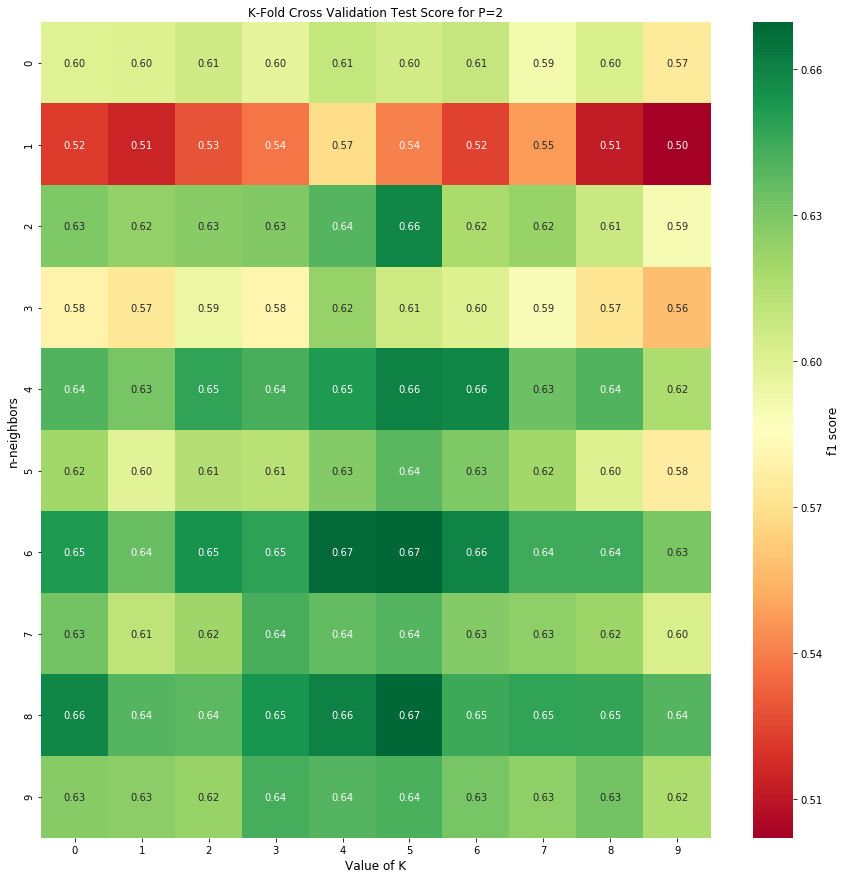

In [283]:
## Creating heatmap
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(vis_df, annot=True, fmt='.2f', cmap='RdYlGn', cbar_kws={'label': 'f1 score'})

## Adding labels 
ax.set_xlabel("Value of K", fontsize = 12)
ax.set_ylabel("n-neighbors", fontsize = 12)
ax.set_title("K-Fold Cross Validation Test Score for P=2", fontsize = 12)
ax.figure.axes[-1].yaxis.label.set_size(12)

We are visualizing 3 features here viz "value of k", "n-neighbors" and score. This heatmap captures the encoding by using color (depending on f1 score) and position (depending on the other two features) in a 2x2 matrix form. The text annotation on individual boxes gives the exact value of f1 score for given combination of k and n-neighbor. 

In [263]:
print(grid.best_score_)
print(grid.best_params_)


0.6507023115566521
{'n_neighbors': 7, 'p': 2}


In [264]:
## Predicting target using best parameters
classifier = KNeighborsClassifier(n_neighbors=7, p=2)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

In [265]:
## Precision, recall and f1 score
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.91      0.89      4534
          1       0.68      0.60      0.64      1499

avg / total       0.83      0.83      0.83      6033



In [266]:
## Accuracy
print(classifier.score(X_test, y_test))

0.8320901707276646


We noticed an imbalance in dataset in visualization 1. Though even after resampling the dataset, the model gave very similar result (and hence that is not included in the code). We could have performed feature selection on the data using feature importance. 

Reference : Lecture 3 slide 19 
            
            https://homes.cs.washington.edu/~jheer/files/zoo/